<img style="width:100px;float:left" src="https://d3rt91u8ecpt22.cloudfront.net/assets/learn/logo-exts-0e71782f000e506b332ae30887d6a959dd3a13bcc0d6fb6bb7797c4f1100a537.svg">

# Course 1 - Course Work: Introduction to Data Analysis with Python
#### Student: Alexander Donders
#### Date: 22.09.2018
***

## Table of Contents

1. [Importing, cleaning and numerical summaries](#A)
2. [Indexing and grouping](#B)
3. [Bar plot of the Happiness Score](#C)
4. [Histogram of Job Satisfaction](#D)
5. [Pairwise Scatter plots](#E)
6. [Correlation](#F)
7. [Probabilities](#G)
8. [Matrices](#H)

***

## A. Importing, cleaning and numerical summaries <a name="A"></a>
1. Download the data set data.csv from the Resources tab.
2. Import the data as a pandas DataFrame.
3. Check the number of observations.
4. Obtain the column headings.
5. Check the data type for each column.
6. Check if there are any missing values.
7. If necessary remove any observations to ensure that there are no missing values and the values in each column are of the same data type.
8. Obtain the mean, minimum and maximum value for each column containing numerical data.
9. List the 10 happiest countries.
1. List the 10 least happy countries.

In [1]:
import pandas as pd
data = pd.read_csv('data.csv', index_col="Country")
data.head(10)

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
Country,,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe
Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,93.8,Western Europe
Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,90.5,North America
New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,88.6,Asia-Pacific
Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,92.7,Western Europe


In [2]:
# ensure that it's a pandas dataframe, check number of observations, 
# obtain column headings, check data type for each column 
# and check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, Norway to Central African Republic
Data columns (total 11 columns):
Happiness Rank      153 non-null int64
Happiness Score     153 non-null float64
Economy             153 non-null float64
Family              153 non-null float64
Health              153 non-null float64
Freedom             153 non-null float64
Generosity          153 non-null float64
Corruption          153 non-null float64
Dystopia            153 non-null float64
Job Satisfaction    151 non-null float64
Region              153 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 14.3+ KB


- Headings are listed
- data types are listed
- We see that there are 153 rows in the data set.
- Job Satisfaction: two missing values

In [3]:
#remove missing values 
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Norway to Central African Republic
Data columns (total 11 columns):
Happiness Rank      151 non-null int64
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 14.2+ KB


- two rows have been removed after applying the command data.dropna()

In [4]:
# although the data set does not indicate any problems with data type consistency within each column,
# this code explicitly sets data types again
data['Happiness Rank'] = data['Happiness Rank'].astype(int)
data['Happiness Score'] = data['Happiness Score'].astype(float)
data['Family'] = data['Family'].astype(float)
data['Health'] = data['Health'].astype(float)
data['Freedom'] = data['Freedom'].astype(float)
data['Generosity'] = data['Generosity'].astype(float)
data['Corruption'] = data['Corruption'].astype(float)
data['Dystopia'] = data['Dystopia'].astype(float)
data['Job Satisfaction'] = data['Job Satisfaction'].astype(float)
data['Region'] = data['Region'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Norway to Central African Republic
Data columns (total 11 columns):
Happiness Rank      151 non-null int64
Happiness Score     151 non-null float64
Economy             151 non-null float64
Family              151 non-null float64
Health              151 non-null float64
Freedom             151 non-null float64
Generosity          151 non-null float64
Corruption          151 non-null float64
Dystopia            151 non-null float64
Job Satisfaction    151 non-null float64
Region              151 non-null object
dtypes: float64(9), int64(1), object(1)
memory usage: 14.2+ KB


- explicit type conversion showed no difference in output

In [5]:
# Obtain the mean, minimum and maximum value for each column containing numerical data.
data.describe()

,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,77.827815,5.357874,0.983895,1.190509,0.550794,0.409805,0.244914,0.123008,1.854910,75.209934
std,44.934732,1.132826,0.420955,0.286371,0.236116,0.150144,0.135236,0.102776,0.502189,12.962365
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914,44.400000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.152574,0.056919,1.605148,68.950000
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.230947,0.089283,1.832910,78.100000
75%,116.500000,6.101500,1.314879,1.418162,0.715975,0.519467,0.323762,0.152207,2.161605,85.100000
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485,95.100000


In [6]:
#list 10 happies countries
data.loc[data['Happiness Rank'] <= 10, ['Happiness Rank']].sort_values(by = 'Happiness Rank', ascending = True)

,Happiness Rank
Country,
Norway,1
Denmark,2
Iceland,3
Switzerland,4
Finland,5
Netherlands,6
Canada,7
New Zealand,8
Sweden,9


In [35]:
# list 10 least happy countries 
data.loc[data['Happiness Rank'] >= data['Happiness Rank'].max() -10, ['Happiness Rank']].sort_values(by = 'Happiness Rank', ascending = True)

,Happiness Rank
Country,
Haiti,145
Yemen,146
Liberia,148
Guinea,149
Togo,150
Rwanda,151
Syria,152
Tanzania,153
Burundi,154


## B. Indexing and grouping <a name="B"></a>
1. Use the column 'Region' to create a separate DataFrame containing the data points from each of the six regions: North America, Latin America, Western Europe, Eastern Europe, Asia Pacific, Africa.
2. Compute the mean happiness score for each region and rank the regions from most happy to least happy.
3. Compute the number of countries in each region that have a happiness score above 6.0.
4. Compute the difference between the maximum and minimum happiness score for each region. Which region has the largest range of happiness scores?

In [21]:
def myAgg(x):
    
    names = {
        'Mean Happiness Score': x['Happiness Score'].mean().round(2),
        'Lowest Happiness Score':  x['Happiness Score'].min().round(2),
        'Highest Happiness Score': x['Happiness Score'].max().round(2),
        'Score Range':  x['Happiness Score'].max() - x['Happiness Score'].min(),
        'Region Happiness Scores Above 6': (x['Happiness Score'] > 6).sum().round(2),
        'Count': (x['Happiness Score'] > 0).sum().round(2),
        'Region Probability of Score Above 6': (x['Happiness Score'] > 6).sum().round(2) / (x['Happiness Score'] > 0).sum().round(2)
    }

    return pd.Series(names, index=['Mean Happiness Score', 'Lowest Happiness Score', 'Highest Happiness Score', 'Score Range', 'Region Happiness Scores Above 6', 'Count', 'Region Probability of Score Above 6'])

data['Region'].replace('Europe','Eastern Europe',inplace=True)
grouped_data = data.groupby('Region').apply(myAgg).sort_values(by = "Mean Happiness Score", ascending = True)
grouped_data

,Mean Happiness Score,Lowest Happiness Score,Highest Happiness Score,Score Range,Region Happiness Scores Above 6,Count,Region Probability of Score Above 6
Region,,,,,,,
Africa,4.25,2.69,5.87,3.179,0.0,43.0,0.000000
Asia-Pacific,5.36,3.46,7.31,3.852,11.0,43.0,0.255814
Eastern Europe,5.44,4.10,6.10,2.002,1.0,22.0,0.045455
Latin America,5.96,3.60,7.08,3.476,13.0,22.0,0.590909
Western Europe,6.88,5.20,7.54,2.342,17.0,19.0,0.894737
North America,7.15,6.99,7.32,0.323,2.0,2.0,1.000000


- Asia Pacific seems to have the largest range of happiness!
- Note that the last two columns are used for a later question and have no use in this exercise.

## C. Bar plot of the Happiness Score <a name="C"></a>
1. Obtain a horizontal bar plot of the Happiness Score of the top 10 countries. Your bar chart should have the names of the countries are listed vertically along the 
y-axis and the 
x-axis should have labels for each number from 0 to 8
. Ensure that the chart has an appropriate title and labels.
2. You will now modify the bar chart you obtained in step 1 to turn into a stacked bar chart where the overall happiness score is divided into the seven parts corresponding to the columns:

    + Economy
    + Family
    + Health
    + Freedom
    + Generosity
    + Corruption
    + Dystopia 
    
   Choose a distinct color for each category and include an appropriate legend with your chart. 


3. Obtain the same stacked horizontal bar chart as in step 2 but this time instead of the top 10 countries consider all countries from the region Africa.

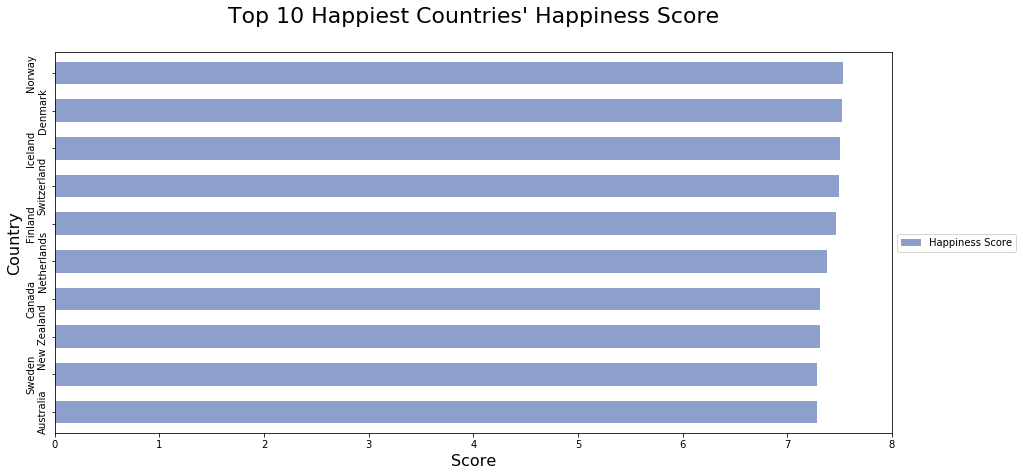

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

labeloffset = ['\n',''] * 5

# Chart 1 Is the chart before modification
pdata = data.loc[data['Happiness Rank']<=10, ['Happiness Score']]
bar_plot = pdata.plot.barh(width=0.6, figsize = (15,7), color=sns.color_palette('Set2')[2])
bar_plot.set_title('Top 10 Happiest Countries\' Happiness Score\n', size = 22)
bar_plot.set_xlabel('Score', size = 16)
bar_plot.set_ylabel('Country', size = 16)
bar_plot.set_yticklabels(labels = pdata.index + labeloffset, rotation=90, verticalalignment='center')
bar_plot.set_xticks(np.arange(0,9))
bar_plot.set_xticklabels(np.arange(0,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
bar_plot.invert_yaxis();

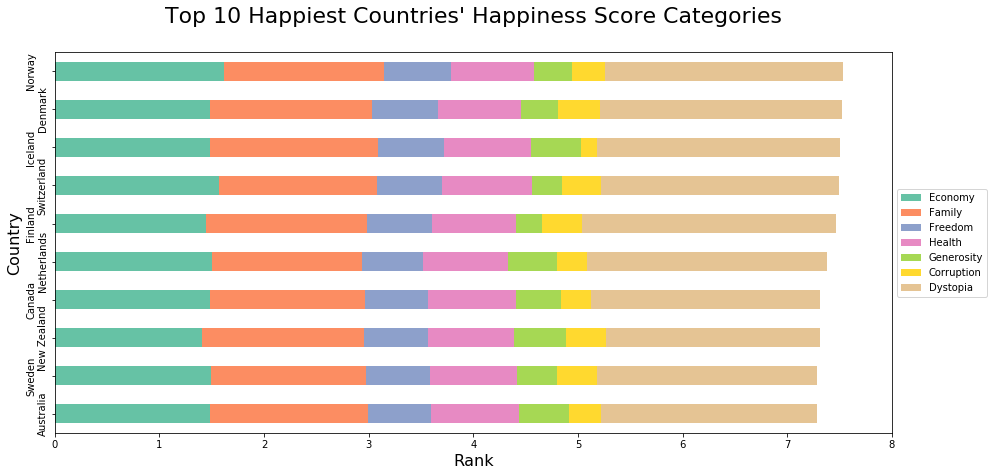

In [112]:
# Chart 2 (Modification of Chart 1.0)
categories = ['Economy','Family','Freedom','Health','Generosity','Corruption','Dystopia']
colors = ['blue','red','green','gray','orange','yellow','black']

npdata = data.loc[data['Happiness Rank']<=10, categories]
bar_plot = npdata.plot(kind = 'barh', stacked = True, color=sns.color_palette('Set2'), figsize = (15,7))
bar_plot.set_title('Top 10 Happiest Countries\' Happiness Score Categories\n', size = 22)
bar_plot.set_xlabel('Rank', size = 16)
bar_plot.set_ylabel('Country', size = 16)
bar_plot.set_yticklabels(labels = pdata.index + labeloffset, rotation=90, verticalalignment='center')
bar_plot.set_xticks(np.arange(0,9))
bar_plot.set_xticklabels(np.arange(0,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
bar_plot.invert_yaxis();

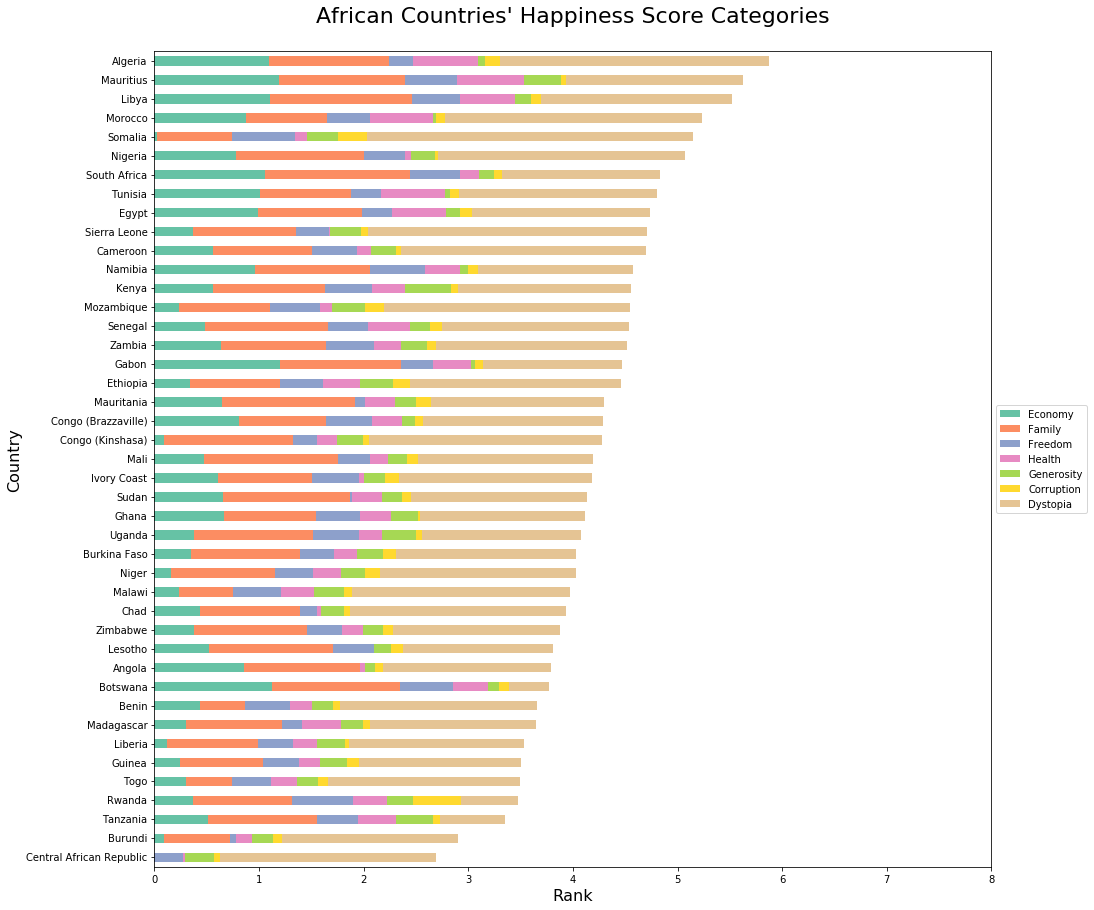

In [97]:
# Chart 3 (Modification of Chart 2)
categories = ['Economy','Family','Freedom','Health','Generosity','Corruption','Dystopia']

npdata = data.loc[data['Region'] == 'Africa', categories]
bar_plot = npdata.plot(kind = 'barh', stacked = True, color=sns.color_palette('Set2'), figsize = (15,15))
bar_plot.set_title('African Countries\' Happiness Score Categories\n', size = 22)
bar_plot.set_xlabel('Rank', size = 16)
bar_plot.set_ylabel('Country', size = 16)
bar_plot.set_yticklabels(labels = npdata.index, verticalalignment='center', )
bar_plot.set_xticks(np.arange(0,9))
bar_plot.set_xticklabels(np.arange(0,9))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
bar_plot.invert_yaxis()


## D. Histogram of Job Satisfaction <a name="D"></a>
Obtain a histogram of the Job Satisfaction using the following categories:
   
   * 40%-50%
   * 50%-60%
   * 60%-70%
   * 70%-80%
   * 80%-90%
   * 90%-100%

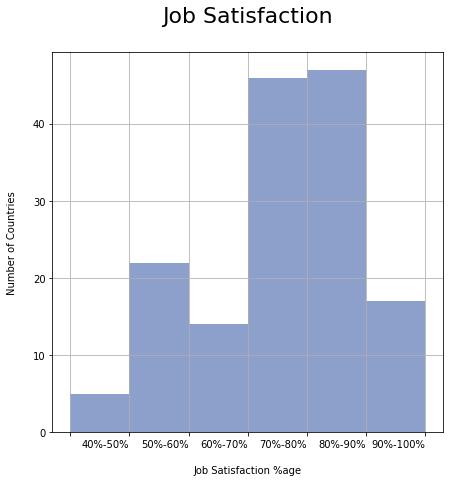

In [120]:
h = data['Job Satisfaction'].hist(range=(40,100), bins = 6, figsize = (7,7), color = sns.color_palette('Set2')[2])
h.set_xticklabels(('','40%-50%','50%-60%','60%-70%','70%-80%','80%-90%', '90%-100%'), horizontalalignment = 'right')
h.set_title('Job Satisfaction\n', size = 22)
h.set_xlabel('\nJob Satisfaction %age')
h.set_ylabel('Number of Countries\n')
h.set_xticks(np.arange(40,110,10))
h;

## E. Pairwise Scatter plots <a name="E"></a>
1. Obtain scatter plots of the Happiness Score versus each of the other variables. Your plots should be displayed as multiple plots table and obtained with one command as supposed to separate commands for each plot.

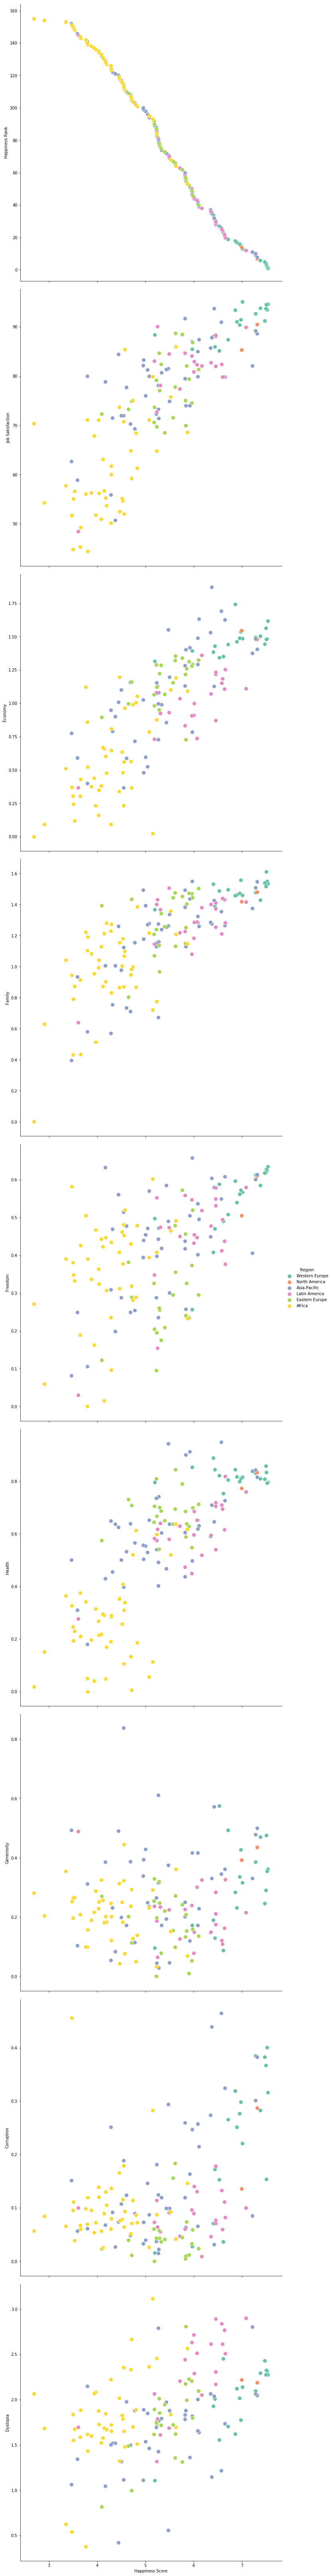

In [121]:
pp = sns.pairplot(data, hue='Region', 
             x_vars=['Happiness Score'], 
             y_vars=['Happiness Rank', 'Job Satisfaction']+categories,
             height = 10, plot_kws={"s": 100}, palette='Set2'
            )

## F. Correlation <a name="F"></a>
1. Obtain the correlation between the Happiness Score and each of the other variables. Which variable has the highest correlation with the Happiness Score?

In [13]:
col = 'Correlation with Happiness Score'
corr = pd.DataFrame(data.iloc[:,1:-1].corrwith(data.iloc[:,1])).iloc[1:,:]
corr.columns = [col]
corr.sort_values(by = col, ascending = False, inplace=True)
corr

,Correlation with Happiness Score
Job Satisfaction,0.812873
Economy,0.808678
Health,0.777731
Family,0.749612
Freedom,0.567948
Dystopia,0.481117
Corruption,0.438262
Generosity,0.164123


- Job Satisfaction is the variable with the highest correlation with the Happiness Score

## G. Probabilities <a name="G"></a>
1. Compute the probability that randomly selected country with Happiness score over 6.0 is from Western Europe. You will have to use pandas to count the appropriate quantities.

P(A|B) = P(B|A) * P(A) / P(B)

P(Western|Above 6) = P(Above 6|Western) * P(Western) / P(Above 6)

In [27]:
ngd = pd.concat([grouped_data,pd.DataFrame(grouped_data.sum(axis=0),columns=['Grand Total']).T])
ngd.at['Grand Total', 'Region Probability of Score Above 6'] = None
ngd['Probability of Region'] = ngd['Count'] / ngd.loc['Grand Total','Count']
ngd['Probability of Above 6'] = ngd.loc['Grand Total','Region Happiness Scores Above 6'] / ngd.loc['Grand Total','Count']  
ngd['Probability of Region given Above 6'] = ngd['Region Probability of Score Above 6'] * ngd['Probability of Region'] / ngd['Probability of Above 6'] 
ngd

,Mean Happiness Score,Lowest Happiness Score,Highest Happiness Score,Score Range,Region Happiness Scores Above 6,Count,Region Probability of Score Above 6,Probability of Region,Probability of Above 6,Probability of Region given Above 6
Africa,4.25,2.69,5.87,3.179,0.0,43.0,0.000000,0.284768,0.291391,0.000000
Asia-Pacific,5.36,3.46,7.31,3.852,11.0,43.0,0.255814,0.284768,0.291391,0.250000
Eastern Europe,5.44,4.10,6.10,2.002,1.0,22.0,0.045455,0.145695,0.291391,0.022727
Latin America,5.96,3.60,7.08,3.476,13.0,22.0,0.590909,0.145695,0.291391,0.295455
Western Europe,6.88,5.20,7.54,2.342,17.0,19.0,0.894737,0.125828,0.291391,0.386364
North America,7.15,6.99,7.32,0.323,2.0,2.0,1.000000,0.013245,0.291391,0.045455
Grand Total,35.04,26.04,41.22,15.174,44.0,151.0,NaN,1.000000,0.291391,NaN


- The probability is 0.386364

## H. Matrices <a name="H"></a>
Define a matrix whose rows correspond to countries and the columns to the regions. Fill in the matrix with 
0/1 values where entry (i,j) is a 1 if the country in row i is in the region in column j and a 0 otherwise.

In [34]:
pd.get_dummies(data.Region, dummy_na=True).values

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)